# Gantt chart example

This shows how to create Gantt charts using Python. I'm wanting to use this kind of chart to plot job arrivals, starts and departures in a queueing network.

I didn't write this code. It comes from the blog post [Create an Advanced Gantt Chart in Python](https://medium.com/geekculture/create-an-advanced-gantt-chart-in-python-f2608a1fd6cc) by Abhijith Chandradas.

See:

- https://medium.com/geekculture/generate-gantt-chart-in-python-9d1e1fe9103e
- https://medium.com/geekculture/create-an-advanced-gantt-chart-in-python-f2608a1fd6cc
- https://github.com/hashABCD/Publications/tree/main/Medium/gantt%20chart

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('schedule.csv')
df.head()

,Task,start,end,Department,Completion
0,Task A,14-Jun-2021,18-Jun-2021,Mkt,100
1,Task B,16-Jun-2021,24-Jun-2021,Fin,100
2,Task C,18-Jun-2021,22-Jun-2021,Fin,100
3,Task D,22-Jun-2021,25-Jun-2021,Mkt,90
4,Task E,22-Jun-2021,30-Jun-2021,HR,60


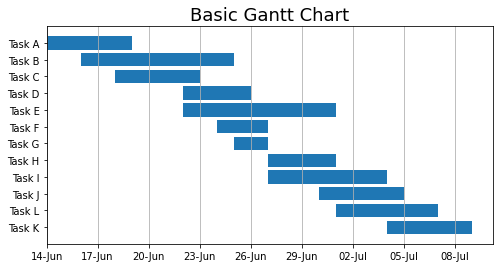

In [8]:
###### PRE-PROCESSING THE DATA ###### 

df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

df['duration'] = df.end-df.start
df.duration = df.duration.apply(lambda x: x.days+1)

# sort in ascending order of start date
df = df.sort_values(by='start', ascending=True)

# project level variables
p_start = df.start.min()
p_end = df.end.max()
p_duration = (p_end-p_start).days + 1

# Add relative date
df['rel_start'] = df.start.apply(lambda x: (x-p_start).days)

# Create custom x-ticks and x-tick labels
x_ticks = [i for i in range(p_duration+1)]
x_labels = [(p_start+dt.timedelta(days=i)).strftime('%d-%b') for i in x_ticks]

######  PLOTTING GANTT CHART ######
plt.figure(figsize=(8,4))
plt.title('Basic Gantt Chart', size=18)
plt.barh(y=df.Task, left=df.rel_start, width=df.duration)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

In [4]:
df['w_comp'] = round(df.Completion*df.duration/100,2)
df.head()

,Task,start,end,Department,Completion,duration,rel_start,w_comp
0,Task A,2021-06-14,2021-06-18,Mkt,100,5,0,5.0
1,Task B,2021-06-16,2021-06-24,Fin,100,9,2,9.0
2,Task C,2021-06-18,2021-06-22,Fin,100,5,4,5.0
3,Task D,2021-06-22,2021-06-25,Mkt,90,4,8,3.6
4,Task E,2021-06-22,2021-06-30,HR,60,9,8,5.4


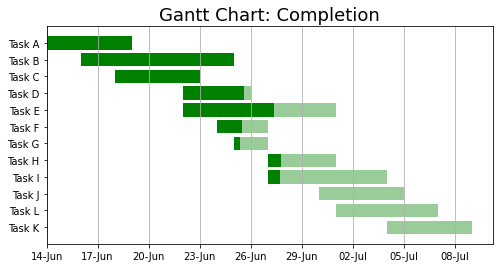

In [7]:
plt.figure(figsize=(8,4))
plt.title('Gantt Chart: Completion', size=18)

# Light bar for entire task
plt.barh(y=df.Task, left=df.rel_start, width=df.duration, alpha=0.4, color='green')

# Darker bar for completed part
plt.barh(y=df.Task, left=df.rel_start, width=df.w_comp, alpha=1, color='green')

plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

The blog post contains further elaborations, but the above is perfect for what I need.